In [1]:
import pandas as pd

import numpy as np
from numpy import loadtxt
from numpy import loadtxt

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


import eli5
from eli5.sklearn import PermutationImportance

from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin

from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
from sklearn.neural_network import MLPClassifier

from IPython.display import Image  

from scipy import stats
from scipy.io import arff

import time
%matplotlib inline

Using TensorFlow backend.
C:\Users\thomas.c.algenio\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df = pd.read_csv('behavioral_revised_data_final.csv')
df

,State,State Code,Sex,Marital Status,Age,Race,Education,Weight(lbs),Height(ft),Income,...,Physical Activity/Day(mints),Smoking,Alcohol/Day,BMI,Blood Pressure,Cholestrol,Heart Disease,Stroke,Cancer,Diabetes
0,Alabama,AL,Female,Widowed,70-74,White only,High School,128,4.99980,20000-25000,...,30.00,Every day,2,Overweight,1,Yes,No,No,No,No
1,Alabama,AL,Male,Married,>80,White only,College 4yrs,172,5.83310,>75000,...,40.00,Not at all,1,Normal Weight,0,No,No,No,No,Yes
2,Alabama,AL,Male,Married,50-54,White only,College 3yrs,135,5.33312,35000-50000,...,308.00,Every day,1,Normal Weight,0,No,No,No,No,Yes
3,Alabama,AL,Male,Married,35-39,White only,College 3yrs,190,5.99976,15000-20000,...,20.00,Every day,1,Overweight,0,No,No,No,No,No
4,Alabama,AL,Male,Married,65-69,White only,College 4yrs,212,5.91643,Refused,...,150.00,Not at all,1,Overweight,1,Yes,Yes,Yes,No,No
5,Alabama,AL,Female,Never married,55-59,Black only,College 4yrs,130,5.49978,15000-20000,...,30.00,Every day,1,Normal Weight,0,Yes,No,No,Yes,No
6,Alabama,AL,Male,Divorced,65-69,Black only,Junior High,157,5.49978,Donâ€™t know/Not sure,...,0.00,Every day,2,Overweight,0,Yes,No,No,No,No
7,Alabama,AL,Female,Never married,50-54,Black only,Junior High,135,5.49978,15000-20000,...,8.57,Some days,3,Normal Weight,1,No,No,No,No,No
8,Alabama,AL,Male,Divorced,70-74,White only,College 4yrs,260,6.16642,35000-50000,...,16.00,Not at all,1,Obese,1,Yes,Yes,No,Yes,No
9,Alabama,AL,Male,Married,55-59,White only,College 3yrs,215,6.08309,50000-75000,...,25.71,Not at all,1,Overweight,0,Yes,No,No,No,No


In [3]:
df1 =df[df != 'Refused']
df2 =df1[df1 != 'Donâ€™t know/Not sure']
df3 =df2[df2 != 'Boderline']
df4 =df3[df3 != 'Donâ€™t know/Not sure/Refused']
df5 =df4[df4 != 'DonÂ´t Know/Not Sure']
df6 = df5.drop(['Cholestrol', 'Heart Disease', 'Stroke', 'Cancer', 'Diabetes','State','State Code','Weight(lbs)','Height(ft)','Vegetables/Day','Fruits/Day','Education'], axis=1)
df7 = df6.dropna()

In [4]:
df8 = pd.get_dummies(df7)
df9 = df8.drop(['Sex_Female'], axis=1)

In [5]:
df9

,Physical Activity/Day(mints),Alcohol/Day,Blood Pressure,Sex_Male,Marital Status_A member of an unmarried couple,Marital Status_Divorced,Marital Status_Married,Marital Status_Never married,Marital Status_Separated,Marital Status_Widowed,...,Income_35000-50000,Income_50000-75000,Income_< 10000,Smoking_Every day,Smoking_Not at all,Smoking_Some days,BMI_Normal Weight,BMI_Obese,BMI_Overweight,BMI_Underweight
0,30.00,2,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,40.00,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,308.00,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3,20.00,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,30.00,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
7,8.57,3,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
8,16.00,1,1,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
9,25.71,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
10,480.00,3,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
11,22.00,3,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [6]:
df10=df9.rename(columns = {'Age_>80':'Age_Greater80','Income_ >75000':'Income_Greater75000','Income_10000-15000':'Income_10000_to_15000',
                     'Income_15000-20000':'Income_15000_20000', 'Income_20000-25000':'Income_20000_25000','Income_25000-35000':'Income_25000-35000',
                      'Income_35000-50000':'Income_35000_50000', 'Income_50000-75000':'Income_50000_75000', 'Income_< 10000': 'Income_Less 10000'})

In [7]:
X = df10.drop(['Blood Pressure'], axis=1)
y = df10['Blood Pressure']

In [8]:
X

,Physical Activity/Day(mints),Alcohol/Day,Sex_Male,Marital Status_A member of an unmarried couple,Marital Status_Divorced,Marital Status_Married,Marital Status_Never married,Marital Status_Separated,Marital Status_Widowed,Age_18-24,...,Income_35000_50000,Income_50000_75000,Income_Less 10000,Smoking_Every day,Smoking_Not at all,Smoking_Some days,BMI_Normal Weight,BMI_Obese,BMI_Overweight,BMI_Underweight
0,30.00,2,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,40.00,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,308.00,1,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3,20.00,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,30.00,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7,8.57,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
8,16.00,1,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
9,25.71,1,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
10,480.00,3,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
11,22.00,3,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [9]:
X.columns

Index(['Physical Activity/Day(mints)', 'Alcohol/Day', 'Sex_Male',
       'Marital Status_A member of an unmarried couple',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Never married', 'Marital Status_Separated',
       'Marital Status_Widowed', 'Age_18-24', 'Age_25-29', 'Age_30-34',
       'Age_35-39', 'Age_40-44', 'Age_45-49', 'Age_50-54', 'Age_55-59',
       'Age_60-64', 'Age_65-69', 'Age_70-74', 'Age_75-79', 'Age_Greater80',
       'Race_Black only', 'Race_Hispanic', 'Race_Multiracial',
       'Race_Other race only', 'Race_White only', 'Income_Greater75000',
       'Income_10000_to_15000', 'Income_15000_20000', 'Income_20000_25000',
       'Income_25000-35000', 'Income_35000_50000', 'Income_50000_75000',
       'Income_Less 10000', 'Smoking_Every day', 'Smoking_Not at all',
       'Smoking_Some days', 'BMI_Normal Weight', 'BMI_Obese', 'BMI_Overweight',
       'BMI_Underweight'],
      dtype='object')

# Logistic Regression

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [283]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(X_train, y_train)

C:\Users\thoma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [284]:
predictionlr1 = lr.predict(X_test)

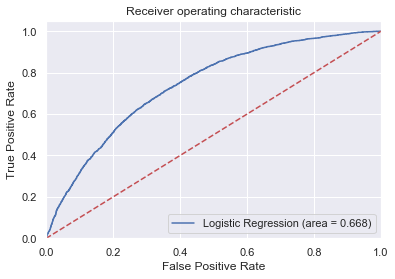

In [285]:
import seaborn as sns; sns.set()
%matplotlib inline

lr_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.3f)' % lr_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc= 'lower right')
plt.show()

In [286]:
accuracylr1 = accuracy_score(y_test, predictionlr1)
classification_reportlr1 = classification_report(y_test, predictionlr1)
fprlr1, tprlr1, thresholdslr1 = roc_curve(y_test, predictionlr1, pos_label=1)
tnlr1, fplr1, fnlr1, tplr1 = confusion_matrix(y_test, lr.predict(X_test)).ravel()
specificitylr1 = tnlr1/(tnlr1+fplr1)

print('True Positives:', tplr1)
print('True Negatives:', tnlr1)
print('False Positives:', fplr1)
print('False Negatives:', fnlr1)

print(classification_reportlr1)
print('Specificity {:0.2}'.format(specificitylr1))
print('Accuracy: %.3f%%' %(accuracylr1 * 100.0))
print('AUC: ', auc(fprlr1, tprlr1))

True Positives: 2410
True Negatives: 4272
False Positives: 1340
False Negatives: 1789
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      5612
           1       0.64      0.57      0.61      4199

    accuracy                           0.68      9811
   macro avg       0.67      0.67      0.67      9811
weighted avg       0.68      0.68      0.68      9811

Specificity 0.76
Accuracy: 68.107%
AUC:  0.6675860610330974


In [287]:
dual = [True, False]
max_iter = [100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250, 300,500]
C= [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual, max_iter=max_iter, C=C)

lr = LogisticRegression('l2',multi_class='ovr')
grid= GridSearchCV(estimator = lr, param_grid= param_grid, cv = 5, n_jobs=-1, scoring='roc_auc')

start_time = time.time()
grid_result = grid.fit(X, y)

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
print('Execution Time: ' + str((time.time() - start_time)) + ' ms')

C:\Users\thoma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best: 0.734465 using {'C': 1.0, 'dual': False, 'max_iter': 100}
Execution Time: 278.1013300418854 ms


In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =101)

In [288]:
lr2 = LogisticRegression(C=1.0, dual = False, max_iter=100, multi_class='ovr')
lr2.fit(X_train, y_train)

C:\Users\thoma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [289]:
predictionlr2 = lr2.predict(X_test)

In [290]:
accuracylr2 = accuracy_score(y_test, predictionlr2)
classification_reportlr2 = classification_report(y_test, predictionlr2)
fprlr2, tprlr2, thresholdslr2 = roc_curve(y_test, predictionlr2, pos_label=1)
tnlr2, fplr2, fnlr2, tplr2 = confusion_matrix(y_test, lr2.predict(X_test)).ravel()
specificitylr2 = tnlr2/(tnlr2+fplr2)

print('True Positives:', tplr2)
print('True Negatives:', tnlr2)
print('False Positives:', fplr2)
print('False Negatives:', fnlr2)

print(classification_reportlr2)
print('Specificity {:0.2}'.format(specificitylr2))
print('Accuracy: %.3f%%' %(accuracylr2 * 100.0))
print('AUC: ', auc(fprlr2, tprlr2))

True Positives: 2410
True Negatives: 4272
False Positives: 1340
False Negatives: 1789
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      5612
           1       0.64      0.57      0.61      4199

    accuracy                           0.68      9811
   macro avg       0.67      0.67      0.67      9811
weighted avg       0.68      0.68      0.68      9811

Specificity 0.76
Accuracy: 68.107%
AUC:  0.6675860610330974


# KNeighbors Classifier

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state =101)

In [292]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [293]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [294]:
predictionknn1 = knn.predict(X_test)

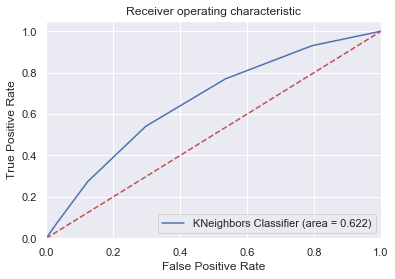

In [295]:
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'KNeighbors Classifier (area = %0.3f)' % knn_roc_auc)
plt.plot([0,1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [296]:
accuracyknn1 = accuracy_score(y_test, predictionknn1)
classification_reportknn1 = classification_report(y_test, predictionknn1)
fprknn1, tprknn1, thresholdsknn1 = roc_curve(y_test, predictionknn1, pos_label=1)

print(classification_reportknn1)
print('Accuract: %.3f%%' %(accuracyknn1 * 100.0))
print('AUC: ', auc(fprknn1, tprknn1))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69      5612
           1       0.58      0.54      0.56      4199

    accuracy                           0.63      9811
   macro avg       0.62      0.62      0.62      9811
weighted avg       0.63      0.63      0.63      9811

Accuract: 63.337%
AUC:  0.6217522941432786


In [297]:
error = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors =i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [298]:
error

[0.4039343593925186,
 0.3869126490673734,
 0.3815105493833452,
 0.3772296401997758,
 0.3666292936499847,
 0.36724085210478036,
 0.36387728060340435,
 0.36295994292121087,
 0.3633676485577413,
 0.3641830598308022,
 0.35613087350932626,
 0.35806747528284577,
 0.35327693405361327,
 0.35602894710019367,
 0.352053817144022,
 0.35123840587096117,
 0.34746712873305474,
 0.34950565691570684,
 0.3451228213230048]

In [299]:
knn2 = KNeighborsClassifier(n_neighbors=20)
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [300]:
predictionknn2 = knn2.predict(X_test)

In [301]:
accuracyknn2 = accuracy_score(y_test, predictionknn2)
classification_reportknn2 = classification_report(y_test, predictionknn2)
fprknn2, tprknn2, thresholdsknn2 = roc_curve(y_test, predictionknn2, pos_label=1)

print(classification_reportknn2)
print('Accuract: %.3f%%' %(accuracyknn2 * 100.0))
print('AUC: ', auc(fprknn2, tprknn2))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      5612
           1       0.62      0.50      0.55      4199

    accuracy                           0.65      9811
   macro avg       0.65      0.63      0.64      9811
weighted avg       0.65      0.65      0.65      9811

Accuract: 65.416%
AUC:  0.6346209649753692


In [303]:
knn3 = KNeighborsClassifier()
params = {'n_neighbors' :[20],
         'leaf_size' :[1,2,3,4],
         'weights' :['uniform', 'distance'],
         'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'],
         'n_jobs' :[-1]}
knn3 = GridSearchCV(knn3, param_grid= params, n_jobs=1, cv=3)
knn3.fit(X_train, y_train)
print('Best Hyper Parameters:\n', knn3.best_params_)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 2, 'n_jobs': -1, 'n_neighbors': 20, 'weights': 'uniform'}


In [304]:
knn4 = KNeighborsClassifier(algorithm='auto', leaf_size=2 , n_jobs= -1, n_neighbors=20, weights='uniform')
knn4.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                     weights='uniform')

In [305]:
predictionknn4 = knn4.predict(X_test)

In [306]:
accuracyknn4 = accuracy_score(y_test, predictionknn4)
classification_reportknn4 = classification_report(y_test, predictionknn4)
fprknn4, tprknn4, thresholdsknn4 = roc_curve(y_test, predictionknn4, pos_label=1)

print(classification_reportknn4)
print('Accuract: %.3f%%' %(accuracyknn4 * 100.0))
print('AUC: ', auc(fprknn4, tprknn4))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      5612
           1       0.62      0.50      0.55      4199

    accuracy                           0.65      9811
   macro avg       0.65      0.63      0.64      9811
weighted avg       0.65      0.65      0.65      9811

Accuract: 65.447%
AUC:  0.6348882493659608


# Random Forest

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [308]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [309]:
predictionrfc1 = rfc.predict(X_test)

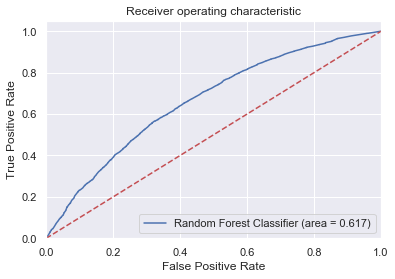

In [310]:
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.3f)' % rfc_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [311]:
accuracyrfc1 = accuracy_score(y_test, predictionrfc1)
classification_reportrfc1 = classification_report(y_test, predictionrfc1)
fprrfc1, tprrfc1, thresholdsrfc1 = roc_curve(y_test, predictionrfc1, pos_label=1)

print(classification_reportrfc1)
print('Accuracy: %.3f%%' %(accuracyrfc1 * 100.0))
print('AUC: ', auc(fprrfc1, tprrfc1))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      5612
           1       0.57      0.54      0.55      4199

    accuracy                           0.63      9811
   macro avg       0.62      0.62      0.62      9811
weighted avg       0.63      0.63      0.63      9811

Accuracy: 62.868%
AUC:  0.6172042158834613


In [313]:
rfc2 = RandomForestClassifier()
params = {'criterion':['gini','entropy'],
         'n_estimators': [10, 15,20,25,30],
         'min_samples_leaf' :[1,2,3],
          'random_state' :[101],
          'n_jobs' :[-1]}
rfc2 = GridSearchCV(rfc2, param_grid=params, n_jobs=-1,cv=3)
rfc2.fit(X_train,y_train)
print('Best Hyper Parameters:\n', rfc2.best_params_)

Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 3, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 101}


In [314]:
rfc3 = RandomForestClassifier(criterion = 'gini', 
                              min_samples_leaf=3, 
                              n_estimators=30, 
                              n_jobs=-1, random_state=101)

rfc3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=101, verbose=0,
                       warm_start=False)

In [315]:
predictionrfc2 = rfc3.predict(X_test)

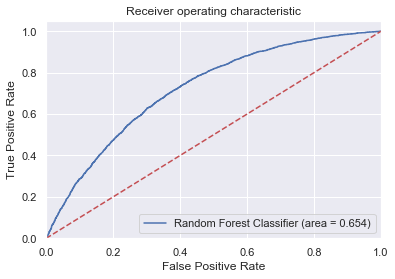

In [316]:
rfc2_roc_auc = roc_auc_score(y_test, rfc3.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.3f)' % rfc2_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [317]:
accuracyrfc2 = accuracy_score(y_test, predictionrfc2)
classification_reportrfc2 = classification_report(y_test, predictionrfc2)
fprrfc2, tprrfc2, thresholdsrfc2 = roc_curve(y_test, predictionrfc2, pos_label=1)

print(classification_reportrfc2)
print('Accuracy: %.3f%%' %(accuracyrfc2 * 100.0))
print('AUC: ', auc(fprrfc2, tprrfc2))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      5612
           1       0.62      0.57      0.59      4199

    accuracy                           0.67      9811
   macro avg       0.66      0.65      0.66      9811
weighted avg       0.66      0.67      0.66      9811

Accuracy: 66.690%
AUC:  0.6543923925816774


# XGBoost

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20,
                                                   random_state=101)

In [319]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [1]:
xgb_pred = xgb.predict(X_test)

predictionxgb1 = [round(value) for value in xgb_pred]

NameError: name 'xgb' is not defined

In [321]:
accuracyxgb1 = accuracy_score(y_test, predictionxgb1)
classification_reportxgb1 = classification_report(y_test, predictionxgb1)
fprxgb1, tprxgb1, thresholdsxgb1 = roc_curve(y_test, predictionxgb1, pos_label=1)

print(classification_reportxgb1)
print('Accuracy: %.3f%%' %(accuracyxgb1 * 100.0))
print('AUC: ', auc(fprxgb1, tprxgb1))

              precision    recall  f1-score   support

           0       0.71      0.77      0.73      5612
           1       0.65      0.57      0.61      4199

    accuracy                           0.68      9811
   macro avg       0.68      0.67      0.67      9811
weighted avg       0.68      0.68      0.68      9811

Accuracy: 68.270%
AUC:  0.6688316907412873


In [322]:
eval_set = [(X_test, y_test)]
xgb.fit(X_train, y_train, eval_metric='error', eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.402915
[1]	validation_0-error:0.386811
[2]	validation_0-error:0.344715
[3]	validation_0-error:0.344307
[4]	validation_0-error:0.340026
[5]	validation_0-error:0.336867
[6]	validation_0-error:0.341352
[7]	validation_0-error:0.341148
[8]	validation_0-error:0.33809
[9]	validation_0-error:0.336153
[10]	validation_0-error:0.341963
[11]	validation_0-error:0.34288
[12]	validation_0-error:0.341352
[13]	validation_0-error:0.339619
[14]	validation_0-error:0.339313
[15]	validation_0-error:0.339415
[16]	validation_0-error:0.336357
[17]	validation_0-error:0.331974
[18]	validation_0-error:0.332484
[19]	validation_0-error:0.329528
[20]	validation_0-error:0.33014
[21]	validation_0-error:0.330242
[22]	validation_0-error:0.330242
[23]	validation_0-error:0.328305
[24]	validation_0-error:0.326674
[25]	validation_0-error:0.32647
[26]	validation_0-error:0.326266
[27]	validation_0-error:0.328203
[28]	validation_0-error:0.324941
[29]	validation_0-error:0.325553
[30]	validation_0-error:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [323]:
print(xgb.feature_importances_)

[0.00370682 0.00534265 0.04152415 0.00443334 0.0058103  0.00512351
 0.00133241 0.         0.04531986 0.0312832  0.03884125 0.05836121
 0.05649783 0.05135665 0.03257054 0.02496791 0.         0.0153041
 0.04822742 0.07124878 0.06886664 0.05560985 0.02586427 0.0018917
 0.00388995 0.         0.00214929 0.04387737 0.00501087 0.00328194
 0.00384974 0.00235929 0.00133343 0.01407007 0.00471569 0.00304811
 0.00344085 0.00250482 0.14578974 0.04274466 0.0129549  0.0114949 ]


In [324]:
n_estimators = range(100,250,50)
max_depth = range(1,3)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

kfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=101)
grid_search = GridSearchCV(xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
result = grid_search.fit(X_test, y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.7s finished


In [325]:
result.best_params_

{'max_depth': 2, 'n_estimators': 200}

In [326]:
xgb2 = XGBClassifier(max_depth=2, n_estimators=200, random_state=101,)
xgb2.fit(X_train, y_train)

xgb_pred2 = xgb.predict(X_test)
predictionxgb2 = [round(value) for value in xgb_pred2]

In [327]:
accuracyxgb2 = accuracy_score(y_test, predictionxgb2)
classification_reportxgb2 = classification_report(y_test, predictionxgb2)
fprxgb2, tprxgb2, thresholdsxgb2 = roc_curve(y_test, predictionxgb2, pos_label=1)

print(classification_reportxgb2)
print('Accuracy: %.3f%%' %(accuracyxgb2 * 100.0))
print('AUC: ', auc(fprxgb2, tprxgb2))

              precision    recall  f1-score   support

           0       0.71      0.77      0.73      5612
           1       0.65      0.57      0.61      4199

    accuracy                           0.68      9811
   macro avg       0.68      0.67      0.67      9811
weighted avg       0.68      0.68      0.68      9811

Accuracy: 68.270%
AUC:  0.6688316907412873


# Artificial Neural Network

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [329]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [331]:
ann = MLPClassifier(hidden_layer_sizes=(100,3), random_state=101, max_iter=300)
ann.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 3), learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=101, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [332]:
predictionann1 = ann.predict(X_test)

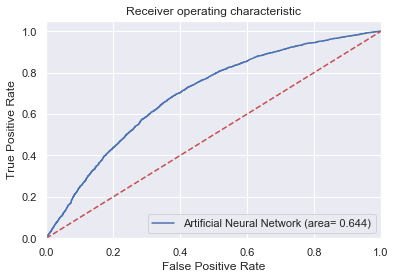

In [333]:
ann_roc_auc = roc_auc_score(y_test, ann.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, ann.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Artificial Neural Network (area= %0.3f)' % ann_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [334]:
accuracyann1 = accuracy_score(y_test, predictionann1)
classification_reportann1 = classification_report(y_test, predictionann1)
fprann1, tprann1, thresholdsann1 = roc_curve(y_test, predictionann1, pos_label=1)

print(classification_reportann1)
print('Accuracy: %.3f%%' %(accuracyann1 * 100.0))
print('AUC: ', auc(fprann1, tprann1))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      5612
           1       0.60      0.58      0.59      4199

    accuracy                           0.65      9811
   macro avg       0.64      0.64      0.64      9811
weighted avg       0.65      0.65      0.65      9811

Accuracy: 65.304%
AUC:  0.6437145965412462


In [336]:
mlp = MLPClassifier(max_iter=300)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

ann2 = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
ann2.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=300,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alph

In [337]:
predictionann2 = ann2.predict(X_test)

In [338]:
accuracyann2 = accuracy_score(y_test, predictionann2)
classification_reportann2 = classification_report(y_test, predictionann2)
fprann2, tprann2, thresholdsann2 = roc_curve(y_test, predictionann2, pos_label=1)

print(classification_reportann2)
print('Accuracy: %.3f%%' %(accuracyann2 * 100.0))
print('AUC: ', auc(fprann2, tprann2))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      5612
           1       0.64      0.59      0.61      4199

    accuracy                           0.68      9811
   macro avg       0.67      0.67      0.67      9811
weighted avg       0.68      0.68      0.68      9811

Accuracy: 68.168%
AUC:  0.6695297449737295


In [339]:
print('Best parameters found:\n', ann2.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'sgd'}


In [340]:
scaler = preprocessing.MinMaxScaler().fit(X_train)

X_scaled = scaler.transform(X_train)

In [341]:
#print(X_train[0])
print(X_scaled[0:])

[[0.02854809 0.         1.         ... 0.         0.         0.        ]
 [0.01763225 0.         1.         ... 0.         1.         0.        ]
 [0.00560412 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         1.         ... 1.         0.         0.        ]
 [0.01259384 0.         1.         ... 0.         1.         0.        ]
 [0.0196056  0.11111111 0.         ... 0.         0.         0.        ]]


In [343]:
mlp = MLPClassifier(max_iter=300)
parameter_space = {
    'hidden_layer_sizes': [(100,),],
    'activation': ['tanh'],
    'solver': ['sgd'],
    'alpha': [0.0001],
    'learning_rate': ['adaptive']
}

ann3 = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
ann3.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=300,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [0.0001],


In [344]:
predictionann3 = ann3.predict(X_test)

In [345]:
accuracyann3 = accuracy_score(y_test, predictionann3)
classification_reportann3 = classification_report(y_test, predictionann3)
fprann3, tprann3, thresholdsann3 = roc_curve(y_test, predictionann3, pos_label=1)

print(classification_reportann3)
print('Accuracy: %.3f%%' %(accuracyann3 * 100.0))
print('AUC: ', auc(fprann3, tprann3))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      5612
           1       0.64      0.59      0.61      4199

    accuracy                           0.68      9811
   macro avg       0.67      0.67      0.67      9811
weighted avg       0.68      0.68      0.68      9811

Accuracy: 68.026%
AUC:  0.6683123989912407


# Top Features

In [347]:
permimportance = PermutationImportance(ann2, random_state=101).fit(X_test,y_test)
important_feats=eli5.explain_weights(permimportance)
important_feats

Weight,Feature
0.0263 ± 0.0034,x38
0.0155 ± 0.0019,x21
0.0128 ± 0.0029,x12
0.0121 ± 0.0013,x11
0.0113 ± 0.0030,x19
0.0102 ± 0.0026,x2
0.0101 ± 0.0008,x39
0.0097 ± 0.0015,x18
0.0097 ± 0.0015,x10
0.0088 ± 0.0018,x20


In [349]:
X= df9.drop(['Blood Pressure'],axis=1)
eli5.show_weights(permimportance, top=65,feature_names=X.columns.tolist())

Weight,Feature
0.0263 ± 0.0034,BMI_Normal Weight
0.0155 ± 0.0019,Age_>80
0.0128 ± 0.0029,Age_35-39
0.0121 ± 0.0013,Age_30-34
0.0113 ± 0.0030,Age_70-74
0.0102 ± 0.0026,Sex_Male
0.0101 ± 0.0008,BMI_Obese
0.0097 ± 0.0015,Age_65-69
0.0097 ± 0.0015,Age_25-29
0.0088 ± 0.0018,Age_75-79


# Visualizations

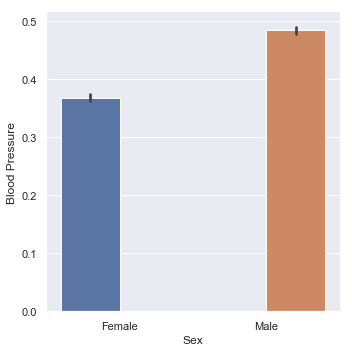

In [239]:
sns.catplot(x="Sex", y="Blood Pressure", hue="Sex", kind="bar", data=df7);
plt.savefig('BP by Sex')
plt.show()

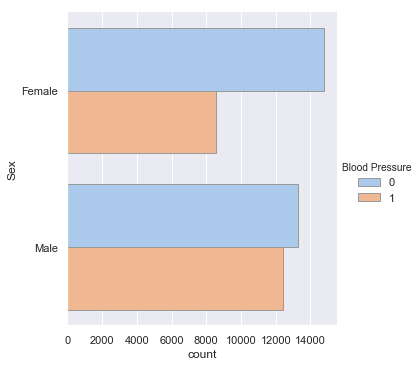

In [266]:
sns.catplot(y="Sex", hue="Blood Pressure", kind="count",
            palette="pastel", edgecolor=".6",
            data=df7);
plt.savefig('BP by Sex Count')
plt.show()

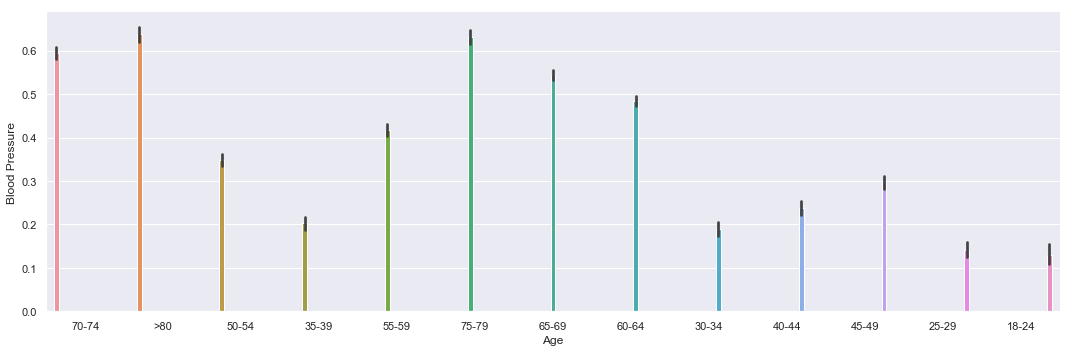

In [241]:
a1=sns.catplot(x="Age", y="Blood Pressure", hue="Age", kind="bar", data=df7,aspect=3, height=5);
plt.savefig('BP by Age')
plt.show()

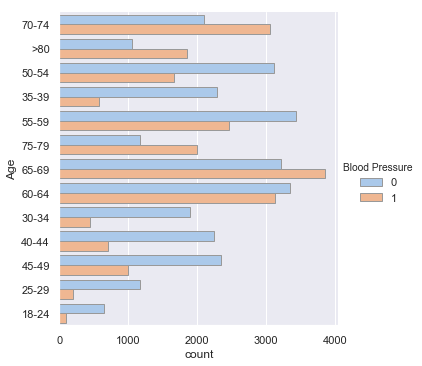

In [267]:
sns.catplot(y="Age", hue="Blood Pressure", kind="count",
            palette="pastel", edgecolor=".6",
            data=df7);
plt.savefig('BP by Age Count')
plt.show()

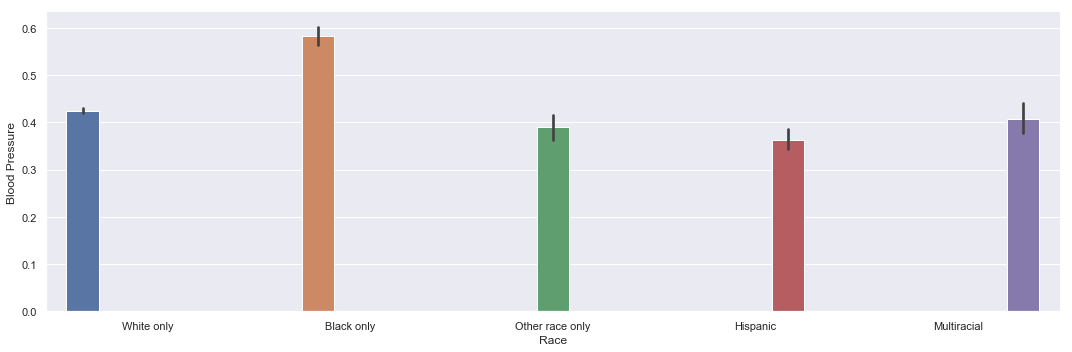

In [242]:
a1=sns.catplot(x="Race", y="Blood Pressure", hue="Race", kind="bar", data=df7,aspect=3, height=5);
plt.savefig('BP by Race')
plt.show()

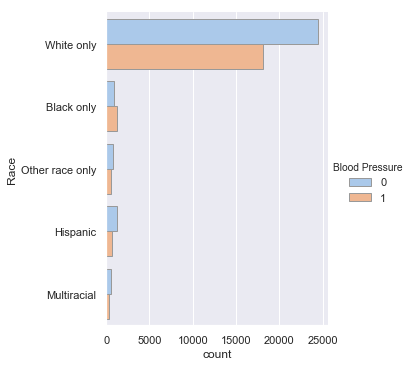

In [268]:
sns.catplot(y="Race", hue="Blood Pressure", kind="count",
            palette="pastel", edgecolor=".6",
            data=df7);
plt.savefig('BP by Race Count')
plt.show()

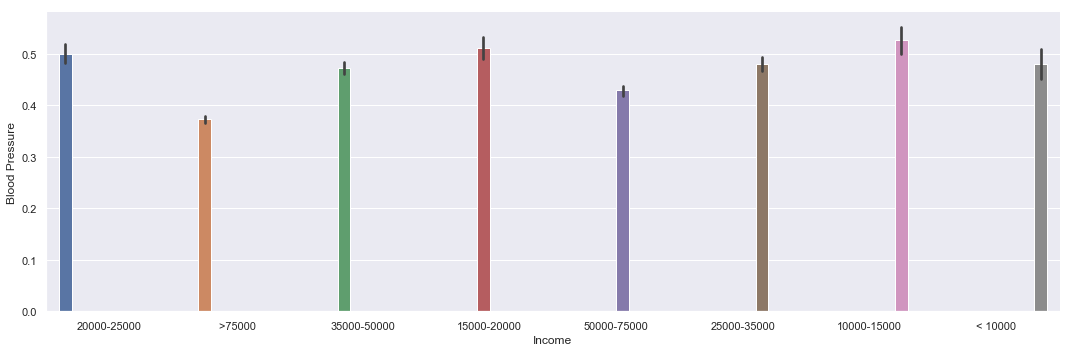

In [243]:
a1=sns.catplot(x="Income", y="Blood Pressure", hue="Income", kind="bar", data=df7,aspect=3, height=5);
plt.savefig('BP by Income')
plt.show()

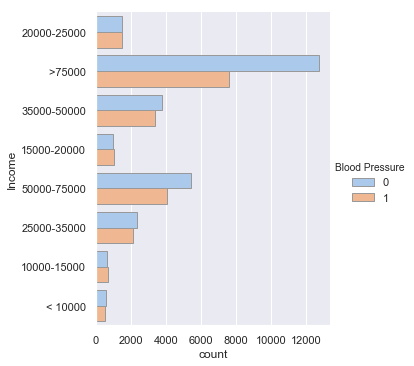

In [269]:
sns.catplot(y="Income", hue="Blood Pressure", kind="count",
            palette="pastel", edgecolor=".6",
            data=df7);
plt.savefig('BP by Income Count')
plt.show()

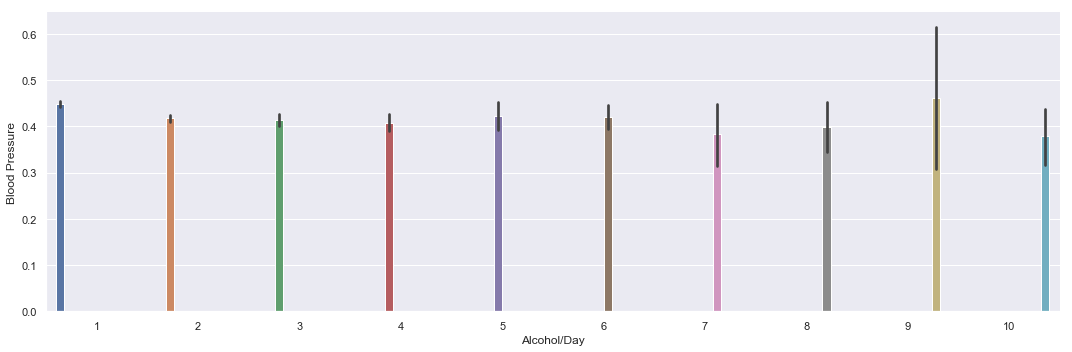

In [245]:
a1=sns.catplot(x="Alcohol/Day", y="Blood Pressure", hue="Alcohol/Day", kind="bar", data=df7,aspect=3, height=5);
plt.savefig('BP by Alcohol_Day')
plt.show()

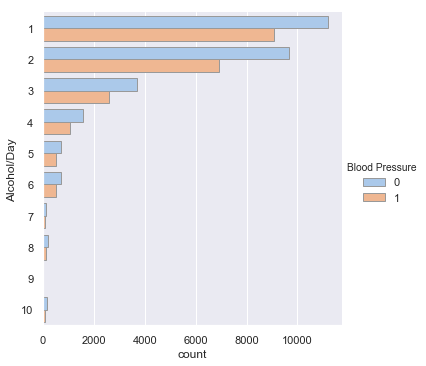

In [270]:
sns.catplot(y="Alcohol/Day", hue="Blood Pressure", kind="count",
            palette="pastel", edgecolor=".6",
            data=df7);
plt.savefig('BP by Alcohol_Day Count')
plt.show()

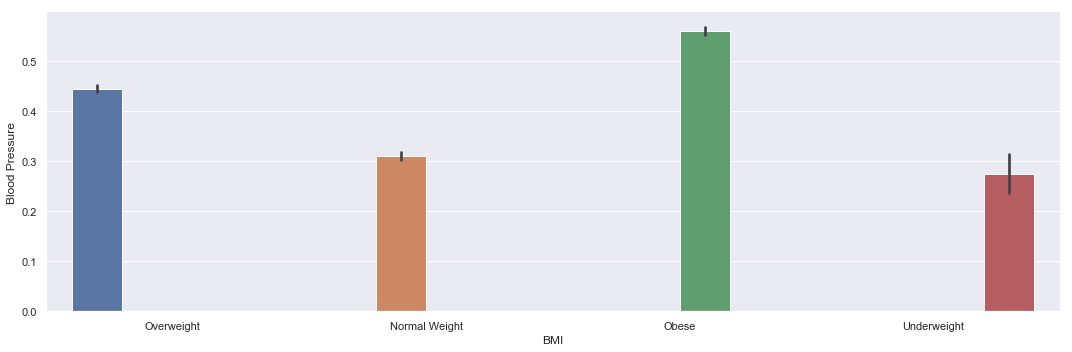

In [246]:
a1=sns.catplot(x="BMI", y="Blood Pressure", hue="BMI", kind="bar", data=df7,aspect=3, height=5);
plt.savefig('BP by BMI')
plt.show()

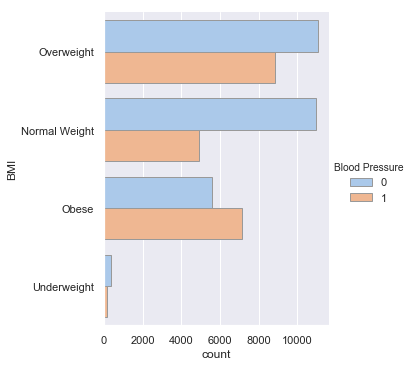

In [271]:
sns.catplot(y="BMI", hue="Blood Pressure", kind="count",
            palette="pastel", edgecolor=".6",
            data=df7);
plt.savefig('BP by BMI Count')
plt.show()

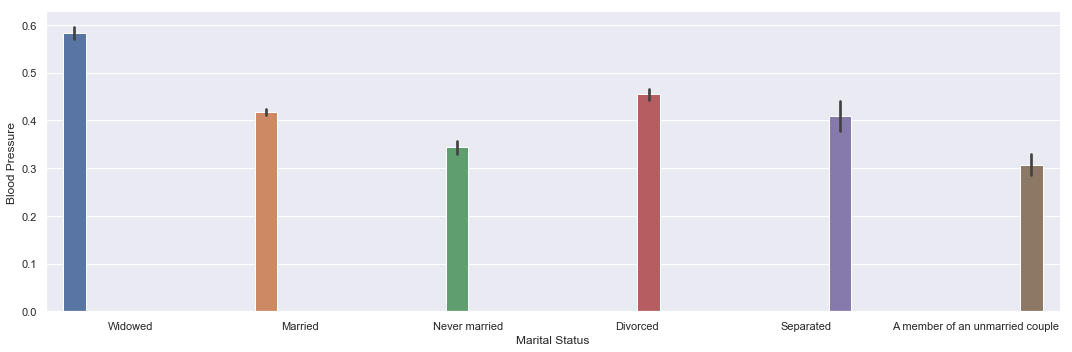

In [247]:
a1=sns.catplot(x="Marital Status", y="Blood Pressure", hue="Marital Status", kind="bar", data=df7,aspect=3, height=5);
plt.savefig('BP by Marital Status')
plt.show()

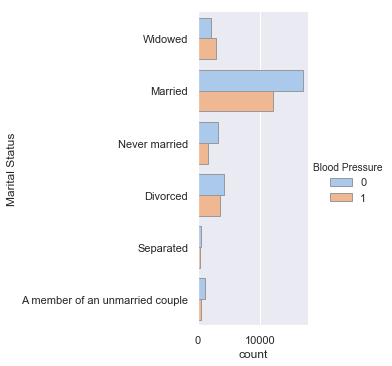

In [272]:
sns.catplot(y="Marital Status", hue="Blood Pressure", kind="count",
            palette="pastel", edgecolor=".6",
            data=df7);
plt.savefig('BP by Marital Status Count')
plt.show()

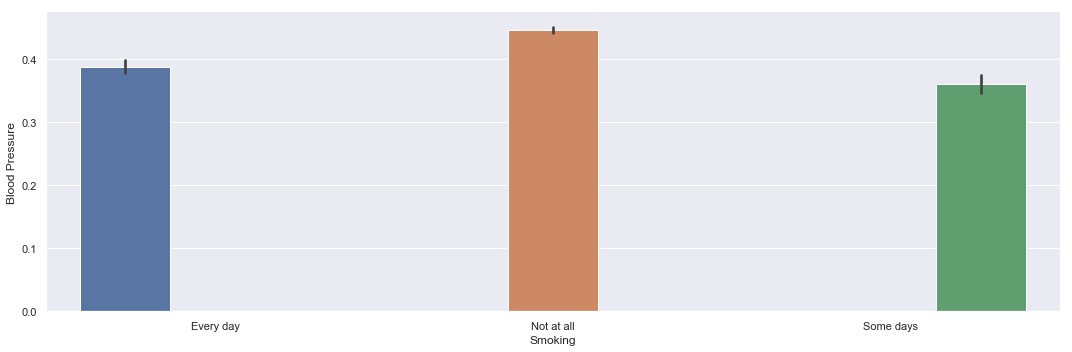

In [248]:
a1=sns.catplot(x="Smoking", y="Blood Pressure", hue="Smoking", kind="bar", data=df7,aspect=3, height=5);
plt.savefig('BP by Smoking')
plt.show()

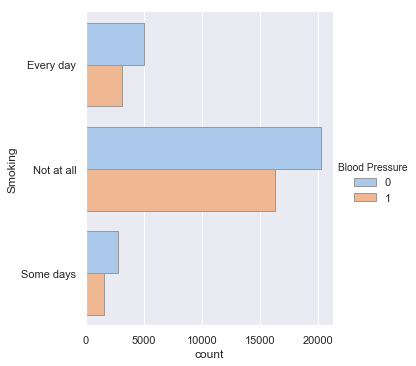

In [273]:
sns.catplot(y="Smoking", hue="Blood Pressure", kind="count",
            palette="pastel", edgecolor=".6",
            data=df7);
plt.savefig('BP by Smoking Count')
plt.show()

# Clean Viz

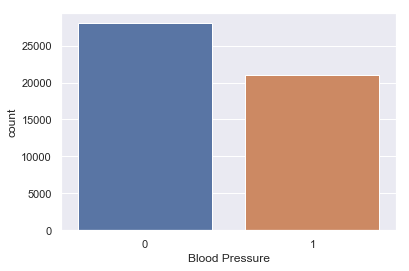

In [46]:
sns.countplot("Blood Pressure",data=df7)
plt.savefig('BP')
plt.show()

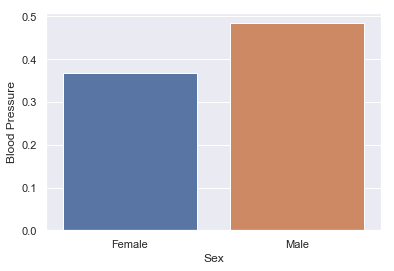

In [47]:
v1 = sns.barplot(x="Sex", y="Blood Pressure", data=df7, ci=None)
plt.savefig('BP by Sex')
plt.show()

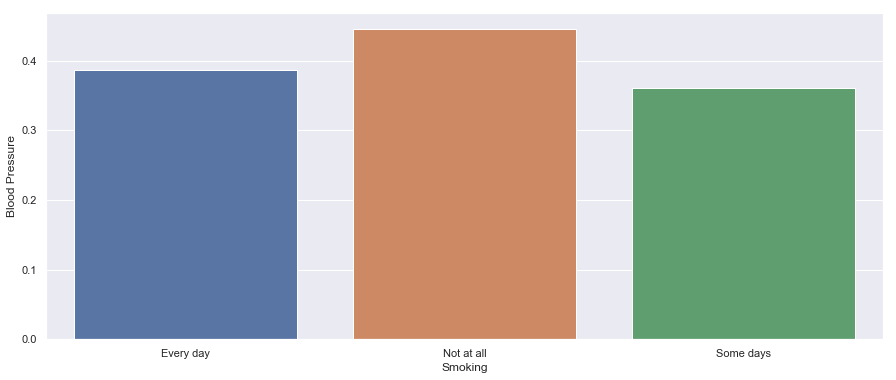

In [48]:
plt.figure(figsize=(15, 6))

v2 = sns.barplot(x='Smoking', y='Blood Pressure', ci=None, data=df7)
plt.savefig('BP by Smoking')
plt.show()

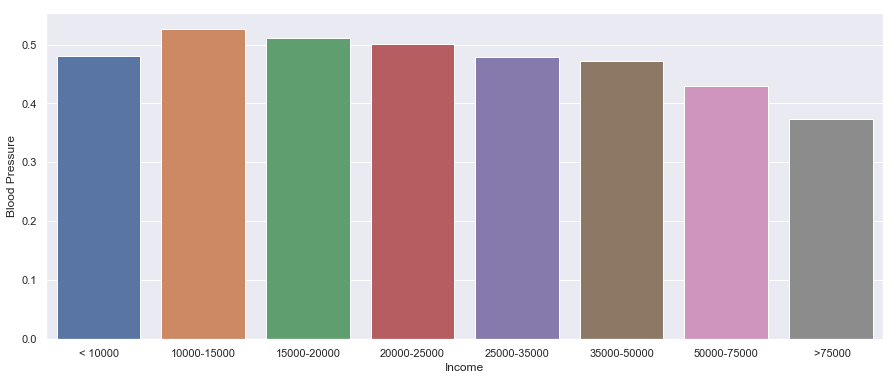

In [49]:
plt.figure(figsize=(15, 6))

v3 = sns.barplot(x='Income', y='Blood Pressure', ci=None, data=df7,order=['< 10000','10000-15000','15000-20000','20000-25000','25000-35000','35000-50000','50000-75000',' >75000'])
plt.savefig('BP by Income')
plt.show()

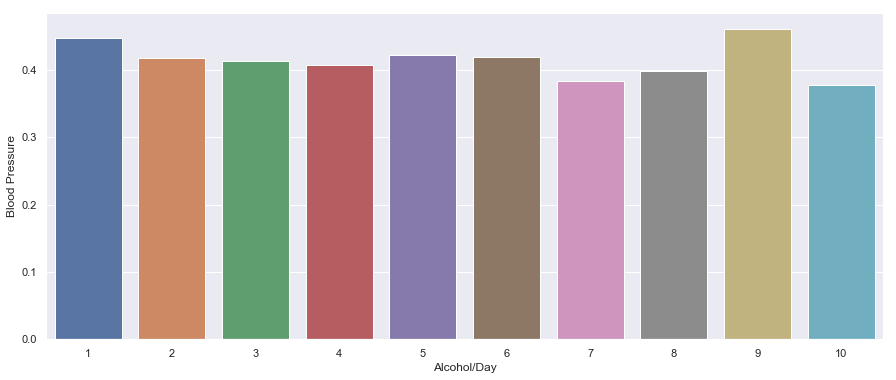

In [50]:
plt.figure(figsize=(15, 6))
v4 = sns.barplot(x='Alcohol/Day', y='Blood Pressure', ci=None, data=df7)
plt.savefig('BP by Alcohol_Day')
plt.show()

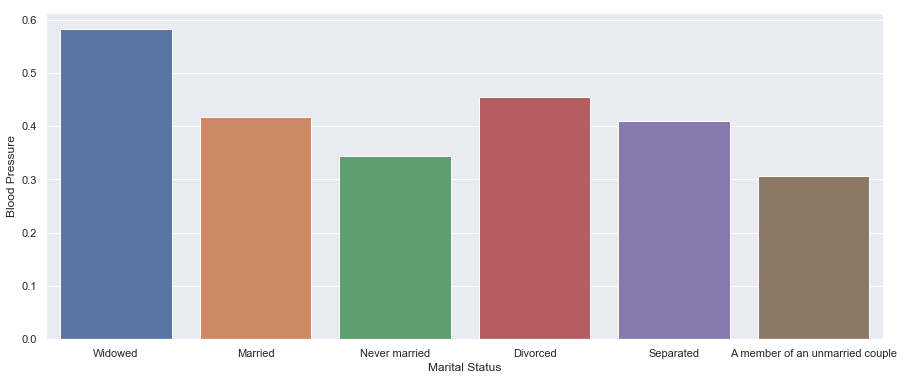

In [51]:
plt.figure(figsize=(15, 6))
v5 = sns.barplot(x='Marital Status', y='Blood Pressure', ci=None, data=df7)
plt.savefig('BP by Marital')
plt.show()

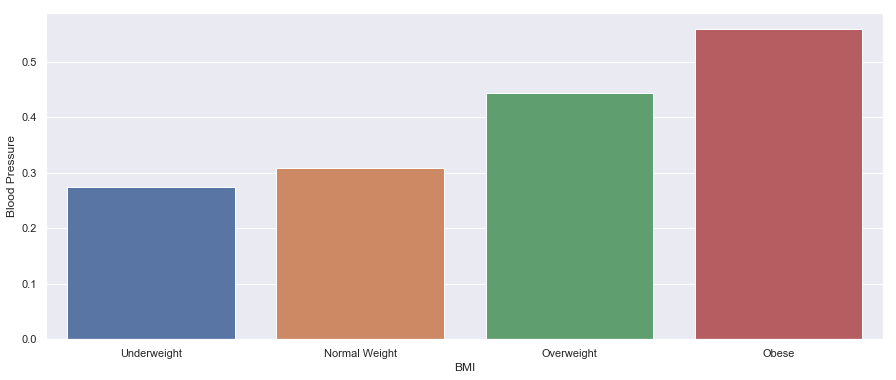

In [52]:
plt.figure(figsize=(15, 6))
v5 = sns.barplot(x='BMI', y='Blood Pressure', ci=None, data=df7, order=['Underweight','Normal Weight','Overweight','Obese'])
plt.savefig('BP by BMI')
plt.show()

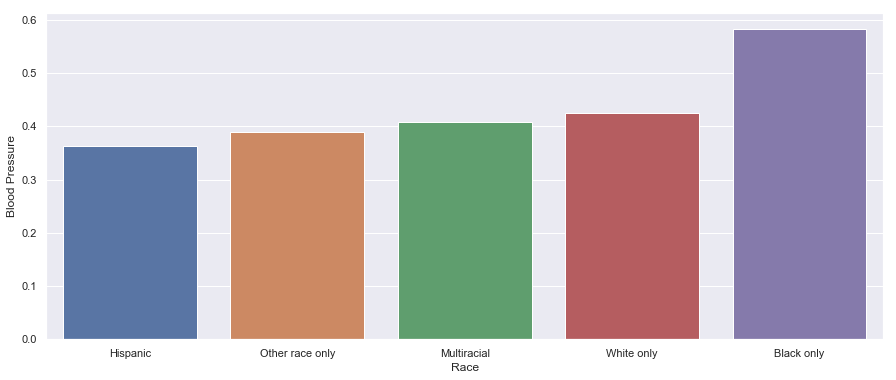

In [53]:
plt.figure(figsize=(15, 6))
v6 = sns.barplot(x='Race', y='Blood Pressure', ci=None, data=df7,order=['Hispanic','Other race only','Multiracial','White only','Black only'])
plt.savefig('BP by Race')
plt.show()

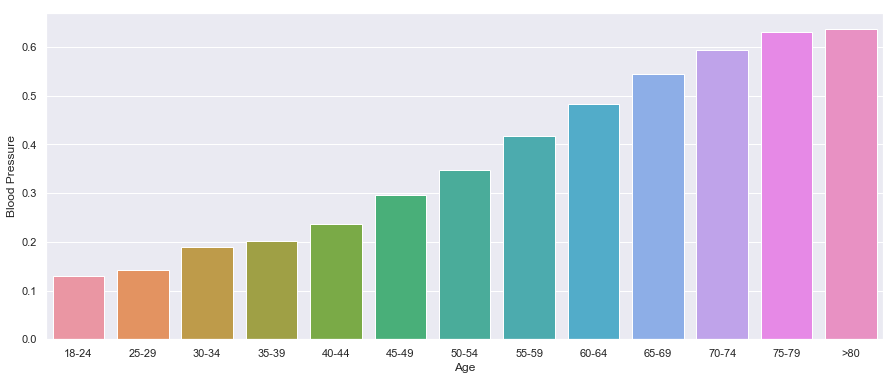

In [54]:
plt.figure(figsize=(15, 6))

v7 = sns.barplot(x='Age', y='Blood Pressure', ci=None, data=df7, order=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','>80'])
plt.savefig('BP by Age')
plt.show()

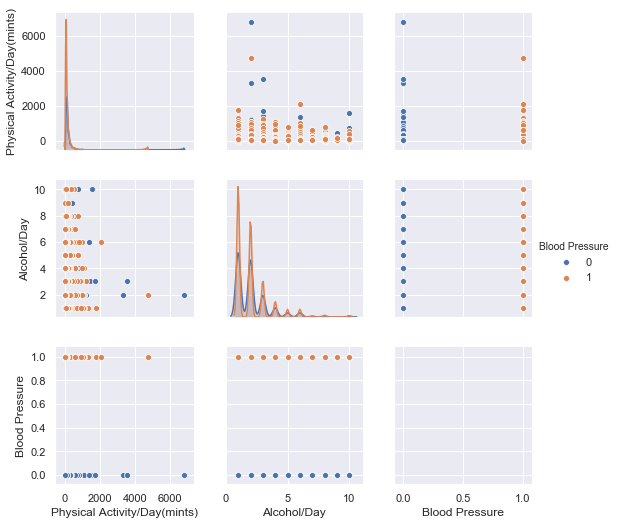

In [58]:
datap=df7
sns.pairplot(datap, hue="Blood Pressure")